## KMeans Clustering -- EDA, JVA & Kinect(HeadDiff)

The clustering analysis below explores how motor sensors used in the MMLA study predict qualitative, collaborative outcomes. Measures used are as follows:
1. EDA: Directional Agreement, Signal Matching, Pearsons' Correlations, Instantaneous Directional Matching
2. JVA: number of jva100 counts per second
3. HeadDiff: vertical difference in head orientation

Clustering analysis was performed by combining each EDA measure with JVA and Kinect, the resulting analyses were:

1. DA+JVA+HeadDiff
2. SM+JVA+HeadDiff
3. PC+JVA+HeadDiff
4. IDM+JVA+HeadDiff

_K in [3,5] for each combination is explored below._

In [1]:
#import packages for clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, '../src/')
import cluster
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sessions = pd.read_csv('../data_master/sessions.csv') #read sessions data
dependent = ['Sustaining Mutual Understanding ', 'Dialogue Management',
             'Information Pooling', 'Reaching Consensus', 'Task Division',
             'Time Managment', 'Technical Coordination', 'Reciprocal Interaction',
             'Individual Task Orientation', 'Collaboration', 'Task Performance',
             'Task Understanding', 'Improvement Over Time', 'Code quality',
             'Learning']

In [3]:
dfMaster = pd.read_csv('../data_master/EDA_JVA_Kinect_MasterScaled.csv', index_col='Unnamed: 0')
dfMaster.head()

,index,session,second,DA,PC,IDM,SM,jva100,moveDiff,headDiff,shoulderDiff,DA_scaled,PC_scaled,IDM_scaled,SM_scaled,jva100_scaled,moveDiff_scaled,headDiff_scaled,shoulderDiff_scaled
0,0,2,1,0.233333,-0.447563,0.177397,0.208709,24.0,1.941329,0.047057,0.658437,-0.408346,-1.253811,-0.669944,-1.363551,1.713567,-0.346045,-0.454587,0.640038
1,1,2,2,0.232708,-0.445837,0.177548,0.207804,7.0,2.013969,0.040868,0.654975,-0.416471,-1.249036,-0.669415,-1.365111,-0.173196,-0.314421,-0.516680,0.612066
2,2,2,3,0.233125,-0.442000,0.177468,0.206289,18.0,1.825878,0.048828,0.642805,-0.411054,-1.238426,-0.669694,-1.367720,1.047651,-0.396306,-0.436817,0.513720
3,3,2,4,0.234583,-0.439776,0.176532,0.205172,23.0,1.675585,0.037022,0.648898,-0.392095,-1.232274,-0.672974,-1.369643,1.602581,-0.461736,-0.555270,0.562954
4,4,2,5,0.234375,-0.438995,0.175948,0.204015,6.0,1.967405,0.042931,0.646596,-0.394804,-1.230112,-0.675019,-1.371636,-0.284182,-0.334693,-0.495984,0.544357


**Optimal K by Distortion Rate**

PC completed
DA completed
SM completed
IDM completed


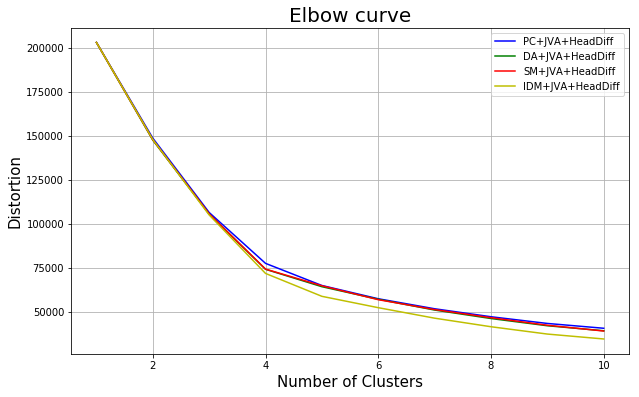

In [8]:
#find optimal number of clustering for KMeans
distortionPC = list() #cache list for distortion value
for n in range(1,11): #fit number of clusters in the range of 1 to 10
    kmeans_pc = KMeans(n_clusters=n, random_state=11)
    kmeans_pc.fit(dfMaster.loc[:, ['PC_scaled','jva100_scaled','headDiff_scaled']]) 
    distortionPC.append(kmeans_pc.inertia_) #append distortion value to list
print('PC completed')

distortionDA = list()
for n in range(1,11):
    kmeans_da = KMeans(n_clusters=n, random_state=11)
    kmeans_da.fit(dfMaster.loc[:, ['DA_scaled','jva100_scaled','headDiff_scaled']])
    distortionDA.append(kmeans_da.inertia_)
print('DA completed')

distortionSM = list()
for n in range(1,11):
    kmeans_sm = KMeans(n_clusters=n, random_state=11)
    kmeans_sm.fit(dfMaster.loc[:, ['SM_scaled','jva100_scaled','headDiff_scaled']])
    distortionSM.append(kmeans_sm.inertia_)
print('SM completed')


distortionIDM = list()
for n in range(1,11):
    kmeans_idm = KMeans(n_clusters=n, random_state=11)
    kmeans_idm.fit(dfMaster.loc[:, ['IDM_scaled','jva100_scaled','headDiff_scaled']])
    distortionIDM.append(kmeans_idm.inertia_)
print('IDM completed')


#plot elbow curves 
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(1, 11), distortionPC, c = 'b', label = 'PC+JVA+HeadDiff')
ax.plot(range(1, 11), distortionDA, c = 'g', label = 'DA+JVA+HeadDiff')
ax.plot(range(1, 11), distortionSM, c = 'r', label = 'SM+JVA+HeadDiff')
ax.plot(range(1, 11), distortionIDM, c = 'y', label = 'IDM+JVA+HeadDiff')
ax.set_xlabel('Number of Clusters', fontsize = 15)
ax.set_ylabel('Distortion', fontsize = 15)
ax.legend(fontsize = 10)
ax.grid(True)
ax.set_title('Elbow curve', fontsize = 20)
plt.show()

In [9]:
fig.savefig("optimalK_eda_jva_kinect.png")

**PC+JVA+Kinect**

In [10]:
#cluster by K=3 , K=4 and K = 5
dfMaster_pc3, centroids_pc3 = cluster.makeCluster(dfMaster, 3, 11, ['PC_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_pc4, centroids_pc4 = cluster.makeCluster(dfMaster, 4, 11, ['PC_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_pc5, centroids_pc5 = cluster.makeCluster(dfMaster, 5, 11, ['PC_scaled','jva100_scaled','headDiff_scaled'])

In [6]:
dfMaster_pc4.to_csv('../data_visualization/PC_JVA_HeadDiff_4.csv')

----
K = 3

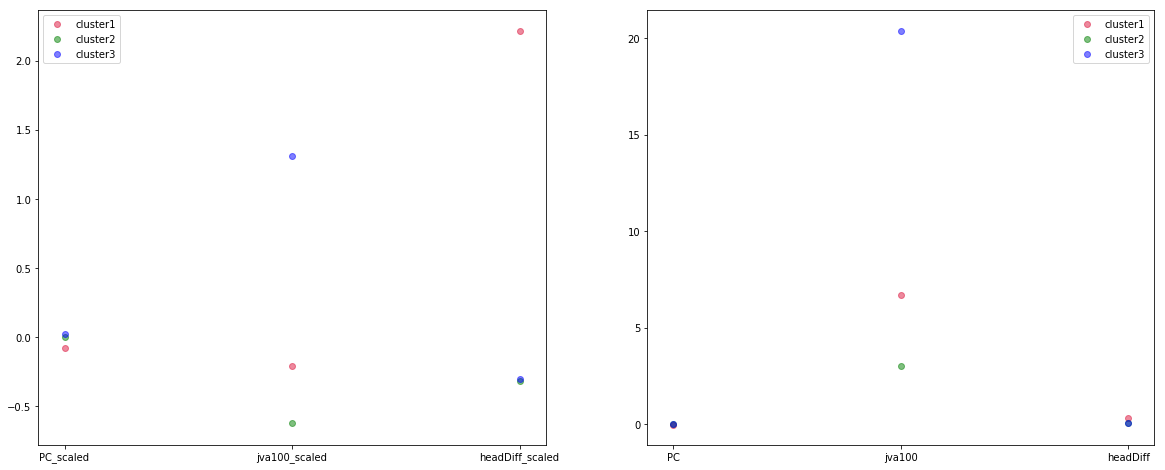

In [11]:
cluster.visualizeCluster(dfMaster_pc3, 3, ['PC_scaled','jva100_scaled','headDiff_scaled'], ['PC','jva100','headDiff'] )

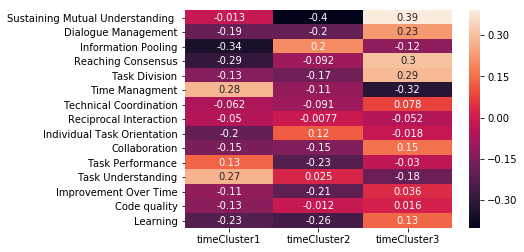

In [12]:
timeCluster_pc3 = cluster.timeCluster(dfMaster_pc3, 3)
sessions_pc3 = sessions.merge(timeCluster_pc3, on = 'Session', how = 'outer') #merge data frames for correlation
time_pc3 = ['timeCluster1','timeCluster2','timeCluster3']

correlations_pc3 = sessions_pc3.corr()
ax = sns.heatmap(correlations_pc3.loc[dependent][time_pc3], annot=True)

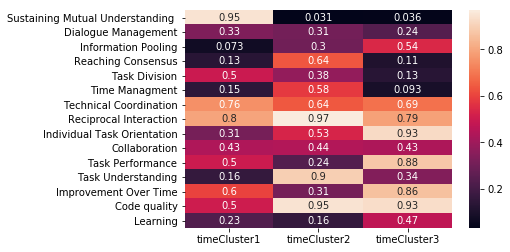

In [13]:
pvalues_pc3 = cluster.calculate_pvalues(sessions_pc3).astype(float)
ax = sns.heatmap(pvalues_pc3.loc[dependent][time_pc3], annot=True)

Significant correlations: 1) time spent in cluster 2 (lowest jva) and sustaining mutual understanding ( p = 0.031), 2) time spent in cluster 3 (highest pc, highest jva) and sustaining mutual understanding (p = 0.036).

----
K = 4

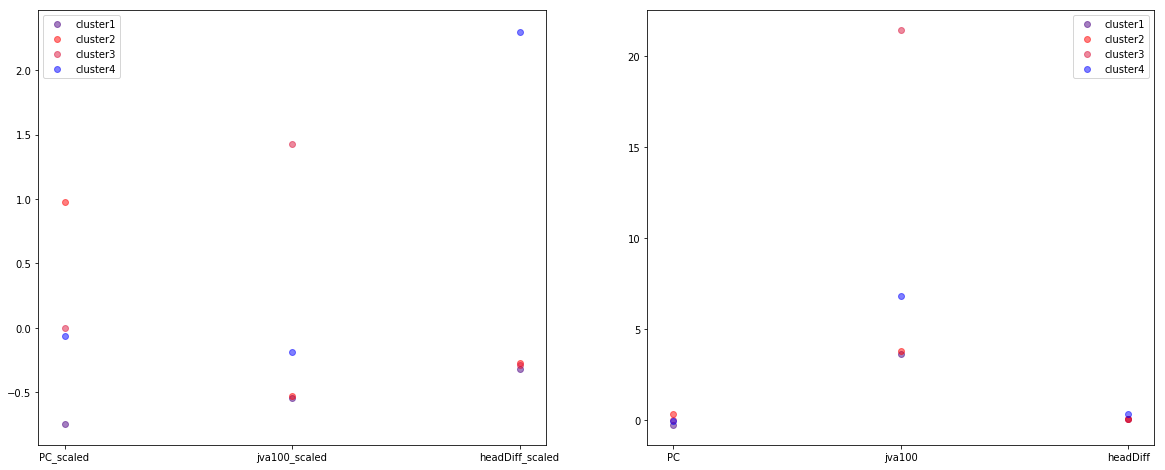

In [14]:
cluster.visualizeCluster(dfMaster_pc4, 4, ['PC_scaled','jva100_scaled','headDiff_scaled'], ['PC','jva100','headDiff'] )

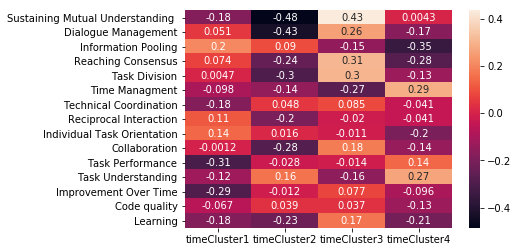

In [15]:
timeCluster_pc4 = cluster.timeCluster(dfMaster_pc4, 4)
sessions_pc4 = sessions.merge(timeCluster_pc4, on = 'Session', how = 'outer') #merge data frames for correlation
time_pc4 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4']

correlations_pc4 = sessions_pc4.corr()
ax = sns.heatmap(correlations_pc4.loc[dependent][time_pc4], annot=True)

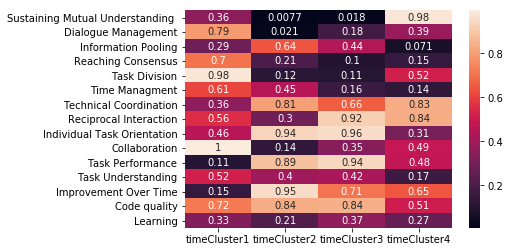

In [16]:
pvalues_pc4 = cluster.calculate_pvalues(sessions_pc4).astype(float)
ax = sns.heatmap(pvalues_pc4.loc[dependent][time_pc4], annot=True)

Significant correlations: 1) time spent in cluster 2 (Highest PC) and sustaining mutual understanding (p = 0.008), dialogue management (p = 0.021), 2) time spent in cluster 3 (Highest jva) and sustaining mutual understanding (p = 0.018).

----
K = 5

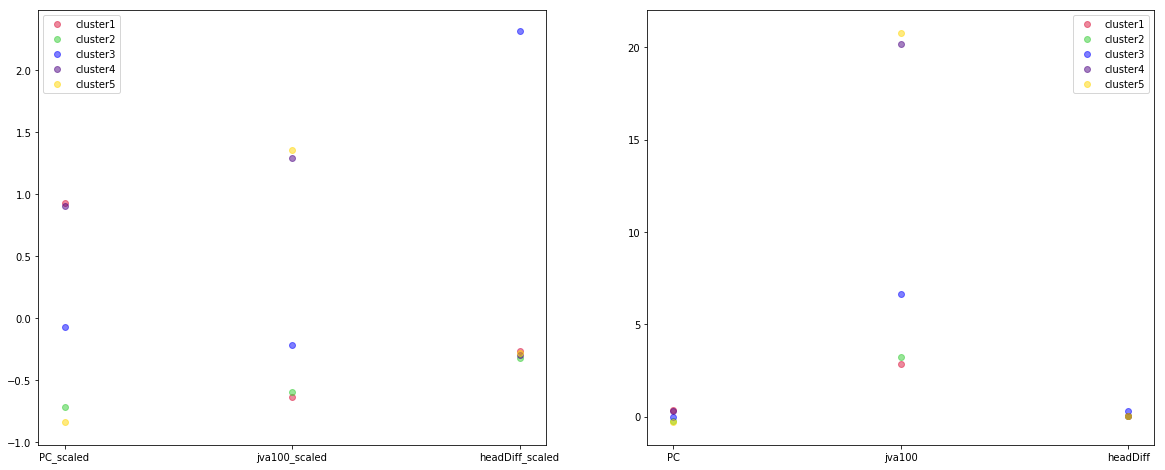

In [17]:
cluster.visualizeCluster(dfMaster_pc5, 5, ['PC_scaled','jva100_scaled','headDiff_scaled'], ['PC','jva100','headDiff'] )

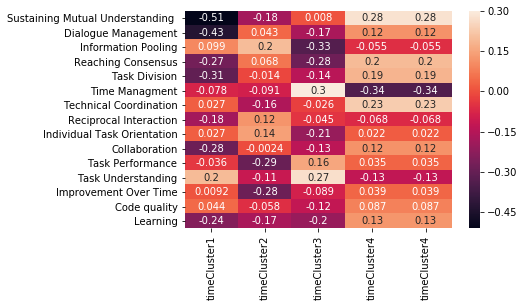

In [18]:
timeCluster_pc5 = cluster.timeCluster(dfMaster_pc5, 5)
sessions_pc5 = sessions.merge(timeCluster_pc5, on = 'Session', how = 'outer') #merge data frames for correlation
time_pc5 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4','timeCluster4']

correlations_pc5 = sessions_pc5.corr()
ax = sns.heatmap(correlations_pc5.loc[dependent][time_pc5], annot=True)

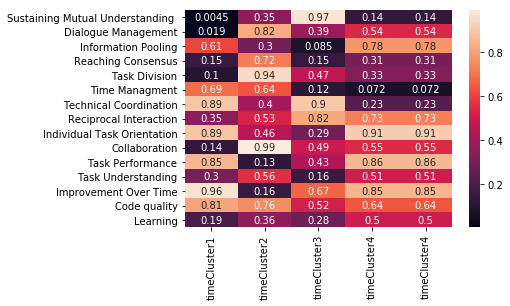

In [19]:
pvalues_pc5 = cluster.calculate_pvalues(sessions_pc5).astype(float)
ax = sns.heatmap(pvalues_pc5.loc[dependent][time_pc5], annot=True)

Significant correlations: 1) time spent in cluster 1 and sustaining mutual understanding (p = 0.0045), dialogue management (p = 0.019).

**SM+JVA+Kinect**

In [20]:
#cluster by K=3 , K=4 and K = 5
dfMaster_sm3, centroids_sm3 = cluster.makeCluster(dfMaster, 3, 11, ['SM_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_sm4, centroids_sm4 = cluster.makeCluster(dfMaster, 4, 11, ['SM_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_sm5, centroids_sm5 = cluster.makeCluster(dfMaster, 5, 11, ['SM_scaled','jva100_scaled','headDiff_scaled'])

In [19]:
dfMaster_sm4.to_csv('../data_visualization/SM_JVA_HeadDiff_4.csv')

----
K = 3

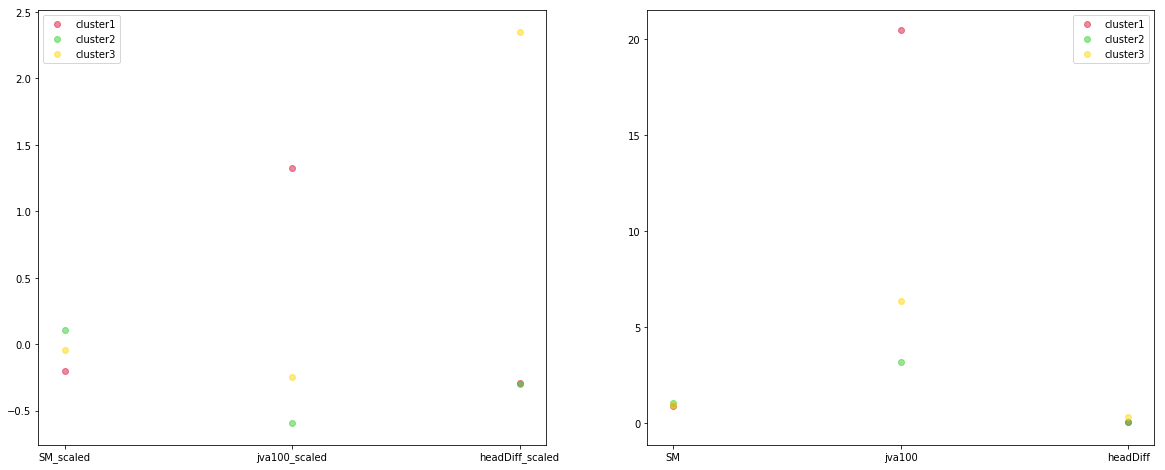

In [21]:
cluster.visualizeCluster(dfMaster_sm3, 3, ['SM_scaled','jva100_scaled','headDiff_scaled'], ['SM','jva100','headDiff'] )

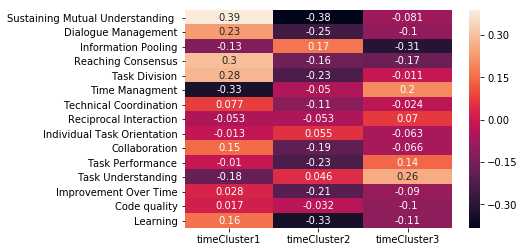

In [22]:
timeCluster_sm3 = cluster.timeCluster(dfMaster_sm3, 3)
sessions_sm3 = sessions.merge(timeCluster_sm3, on = 'Session', how = 'outer') #merge data frames for correlation
time_sm3 = ['timeCluster1','timeCluster2','timeCluster3']

correlations_sm3 = sessions_sm3.corr()
ax = sns.heatmap(correlations_sm3.loc[dependent][time_sm3], annot=True)

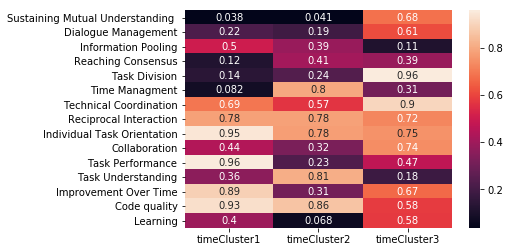

In [23]:
pvalues_sm3 = cluster.calculate_pvalues(sessions_sm3).astype(float)
ax = sns.heatmap(pvalues_sm3.loc[dependent][time_sm3], annot=True)

SIgnificant correlations: 1) time spent in cluster 1 and sustaining mutual understanding (p = 0.038), 2) time spent in cluster 2 and sustaining mutual understanding (p = 0.041)

----
K = 4

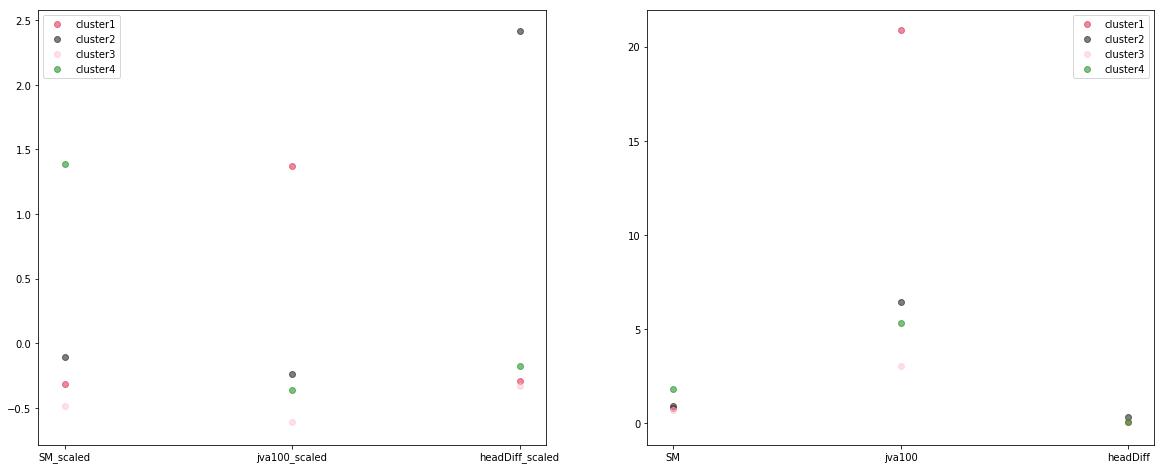

In [24]:
cluster.visualizeCluster(dfMaster_sm4, 4, ['SM_scaled','jva100_scaled','headDiff_scaled'], ['SM','jva100','headDiff'] )

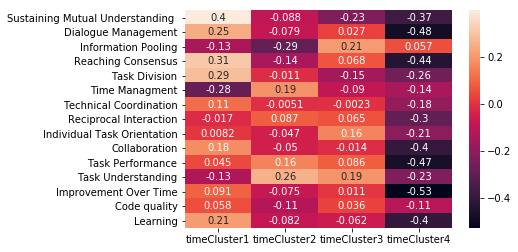

In [25]:
timeCluster_sm4 = cluster.timeCluster(dfMaster_sm4, 4)
sessions_sm4 = sessions.merge(timeCluster_sm4, on = 'Session', how = 'outer') #merge data frames for correlation
time_sm4 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4']

correlations_sm4 = sessions_sm4.corr()
ax = sns.heatmap(correlations_sm4.loc[dependent][time_sm4], annot=True)

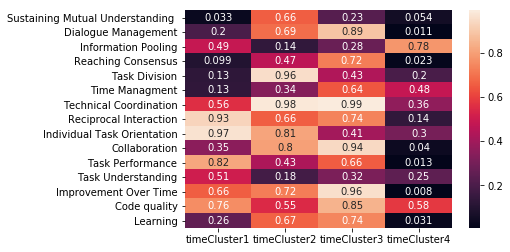

In [26]:
pvalues_sm4 = cluster.calculate_pvalues(sessions_sm4).astype(float)
ax = sns.heatmap(pvalues_sm4.loc[dependent][time_sm4], annot=True)

Significant correlations: 1) time spent in cluster 1 and sustaining mutual understanding (p = 0.033), 2) time spent in cluster 4 and dialogue management (p = 0.011), reaching consensus( p = 0.023), collaboration (p = 0.04), task performance (p =0.013), improvement over time (p = 0.008), and learning (p = 0.031).

Cluster 1:
1. Highest jva

Cluster 4: 
1. Highest SM

----
K = 5

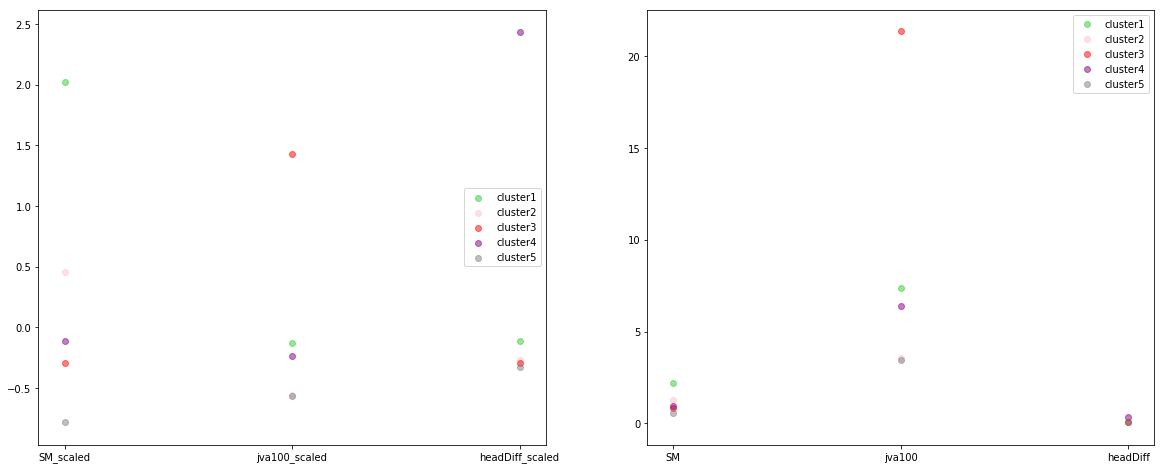

In [27]:
cluster.visualizeCluster(dfMaster_sm5, 5, ['SM_scaled','jva100_scaled','headDiff_scaled'], ['SM','jva100','headDiff'] )

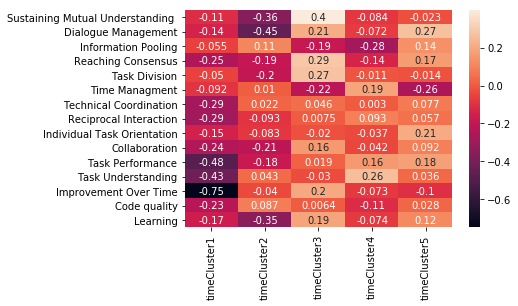

In [28]:
timeCluster_sm5 = cluster.timeCluster(dfMaster_sm5, 5)
sessions_sm5 = sessions.merge(timeCluster_sm5, on = 'Session', how = 'outer') #merge data frames for correlation
time_sm5 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4','timeCluster5']

correlations_sm5 = sessions_sm5.corr()
ax = sns.heatmap(correlations_sm5.loc[dependent][time_sm5], annot=True)

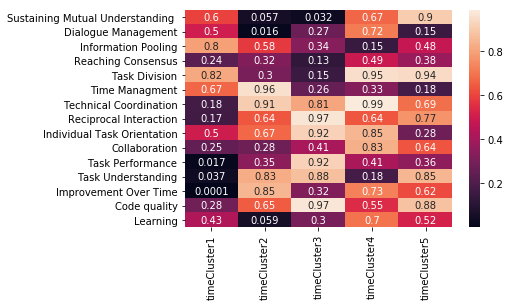

In [29]:
pvalues_sm5 = cluster.calculate_pvalues(sessions_sm5).astype(float)
ax = sns.heatmap(pvalues_sm5.loc[dependent][time_sm5], annot=True)

Significant correlations: 1) time spent in cluster 1 (highest SM, second highest in jva and head diff) and task performance (p = 0.017), task understanding (p = 0.037), improvement over time (p < 0.001), 2) time spent in clutser 2 and dialogue management (p = 0.016), 3) time spent in cluster 3 (highest jva) and sustaining mutual understanding (p = 0.032). 

**DA+JVA+Kinect**

In [30]:
#cluster by K=3 , K=4 and K = 5
dfMaster_da3, centroids_da3 = cluster.makeCluster(dfMaster, 3, 11, ['DA_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_da4, centroids_da4 = cluster.makeCluster(dfMaster, 4, 11, ['DA_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_da5, centroids_da5 = cluster.makeCluster(dfMaster, 5, 11, ['DA_scaled','jva100_scaled','headDiff_scaled'])

In [29]:
dfMaster_da4.to_csv('../data_visualization/DA_JVA_HeadDiff_4.csv')

----
K = 3

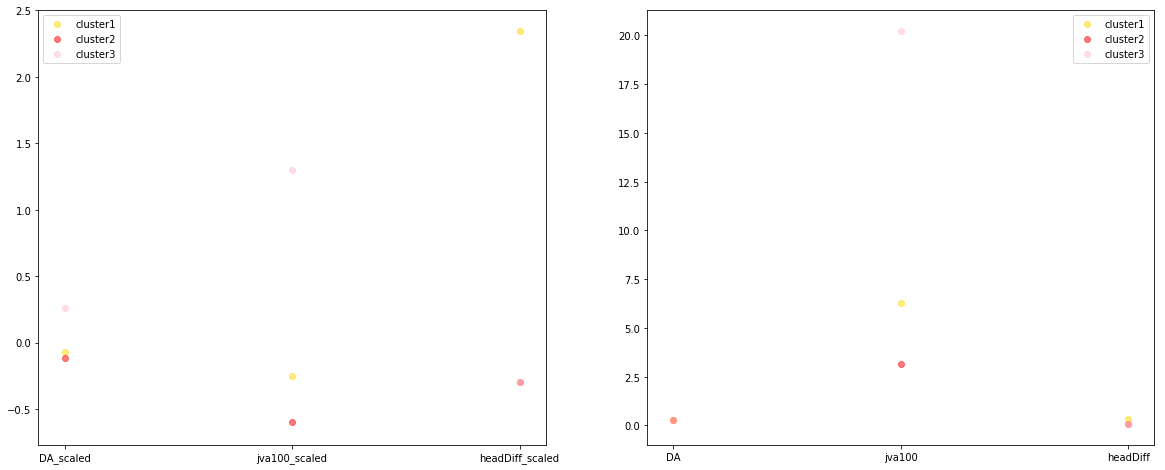

In [31]:
cluster.visualizeCluster(dfMaster_da3, 3, ['DA_scaled','jva100_scaled','headDiff_scaled'], ['DA','jva100','headDiff'] )

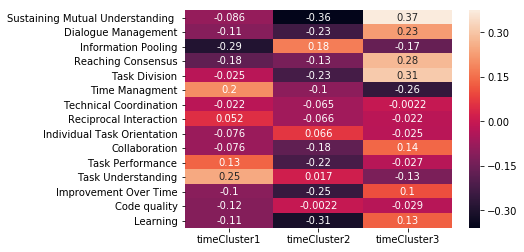

In [32]:
timeCluster_da3 = cluster.timeCluster(dfMaster_da3, 3)
sessions_da3 = sessions.merge(timeCluster_da3, on = 'Session', how = 'outer') #merge data frames for correlation
time_da3 = ['timeCluster1','timeCluster2','timeCluster3']

correlations_da3 = sessions_da3.corr()
ax = sns.heatmap(correlations_da3.loc[dependent][time_da3], annot=True)

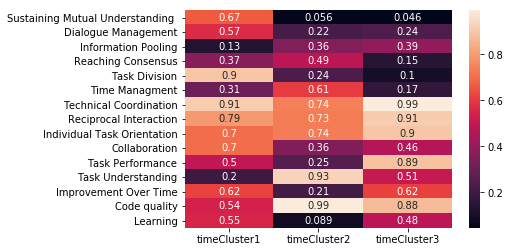

In [33]:
pvalues_da3 = cluster.calculate_pvalues(sessions_da3).astype(float)
ax = sns.heatmap(pvalues_da3.loc[dependent][time_da3], annot=True)

No significant correlations observed.

----
K = 4

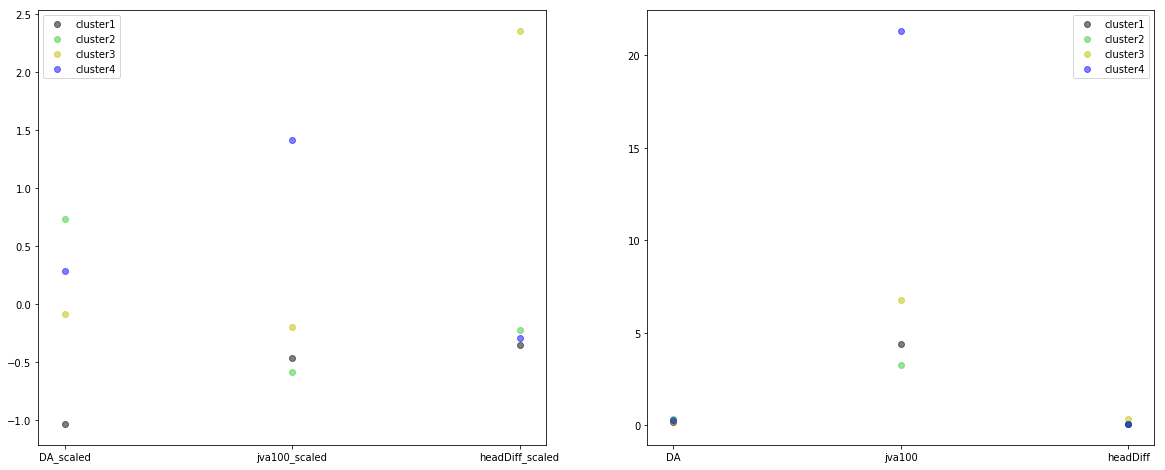

In [34]:
cluster.visualizeCluster(dfMaster_da4, 4, ['DA_scaled','jva100_scaled','headDiff_scaled'], ['DA','jva100','headDiff'] )

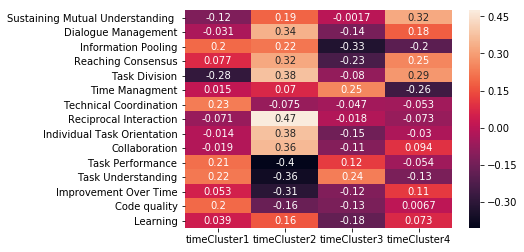

In [35]:
timeCluster_da4 = cluster.timeCluster(dfMaster_da4, 4)
sessions_da4 = sessions.merge(timeCluster_da4, on = 'Session', how = 'outer') #merge data frames for correlation
time_da4 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4']

correlations_da4 = sessions_da4.corr()
ax = sns.heatmap(correlations_da4.loc[dependent][time_da4], annot=True)

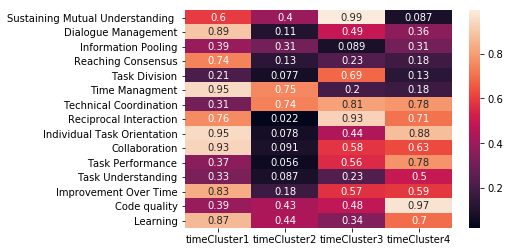

In [36]:
pvalues_da4 = cluster.calculate_pvalues(sessions_da4).astype(float)
ax = sns.heatmap(pvalues_da4.loc[dependent][time_da4], annot=True)

Significant correlations: 1) time spent in cluster 2 and reciprocal interaction (p = 0.022).

----
K = 5

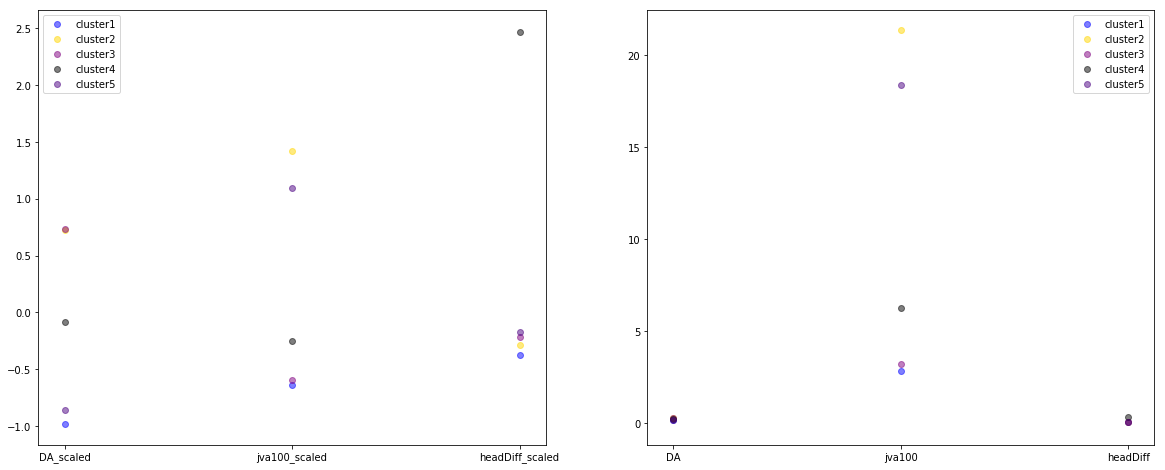

In [37]:
cluster.visualizeCluster(dfMaster_da5, 5, ['DA_scaled','jva100_scaled','headDiff_scaled'], ['DA','jva100','headDiff'] )

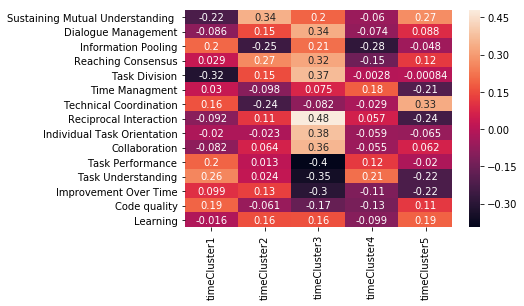

In [38]:
timeCluster_da5 = cluster.timeCluster(dfMaster_da5, 5)
sessions_da5 = sessions.merge(timeCluster_da5, on = 'Session', how = 'outer') #merge data frames for correlation
time_da5 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4','timeCluster5']

correlations_da5 = sessions_da5.corr()
ax = sns.heatmap(correlations_da5.loc[dependent][time_da5], annot=True)

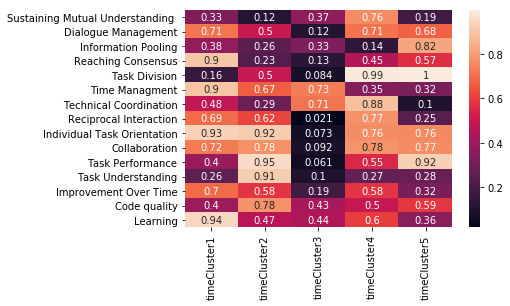

In [39]:
pvalues_da5 = cluster.calculate_pvalues(sessions_da5).astype(float)
ax = sns.heatmap(pvalues_da5.loc[dependent][time_da5], annot=True)

Significant correlation between time spent in cluster 3 and reciprocal interaction (p = 0.021).

**IDM+JVA+Kinect**

In [40]:
#cluster by K=3 , K=4 and K = 5
dfMaster_idm3, centroids_idm3 = cluster.makeCluster(dfMaster, 3, 11, ['IDM_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_idm4, centroids_idm4 = cluster.makeCluster(dfMaster, 4, 11, ['IDM_scaled','jva100_scaled','headDiff_scaled'])
dfMaster_idm5, centroids_idm5 = cluster.makeCluster(dfMaster, 5, 11, ['IDM_scaled','jva100_scaled','headDiff_scaled'])

In [40]:
dfMaster_idm4.to_csv('IDM_JVA_HeadDiff_4.csv')

----
K = 3

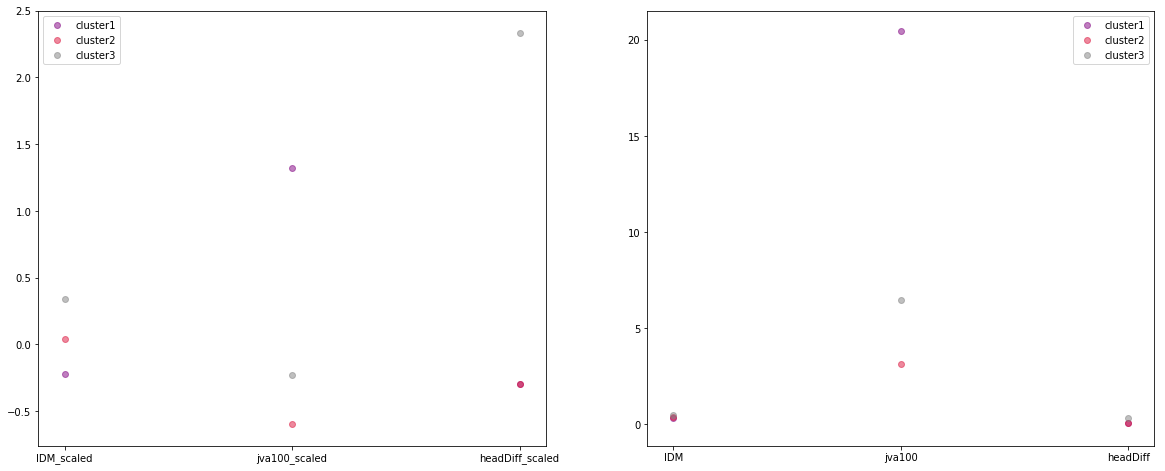

In [41]:
cluster.visualizeCluster(dfMaster_idm3, 3,['IDM_scaled','jva100_scaled','headDiff_scaled'],['IDM','jva100','headDiff'] )

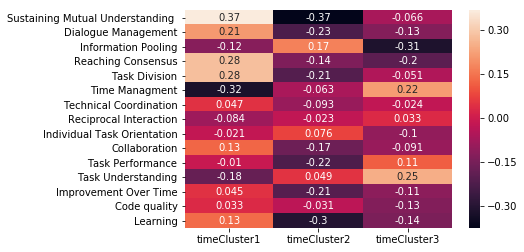

In [42]:
timeCluster_idm3 = cluster.timeCluster(dfMaster_idm3, 3)
sessions_idm3 = sessions.merge(timeCluster_idm3, on = 'Session', how = 'outer') #merge data frames for correlation
time_idm3 = ['timeCluster1','timeCluster2','timeCluster3']

correlations_idm3 = sessions_idm3.corr()
ax = sns.heatmap(correlations_idm3.loc[dependent][time_idm3], annot=True)

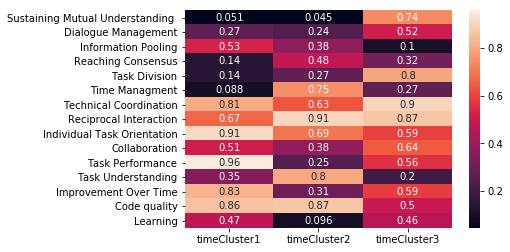

In [43]:
pvalues_idm3 = cluster.calculate_pvalues(sessions_idm3).astype(float)
ax = sns.heatmap(pvalues_idm3.loc[dependent][time_idm3], annot=True)

No significant correlations observed

----
K = 4

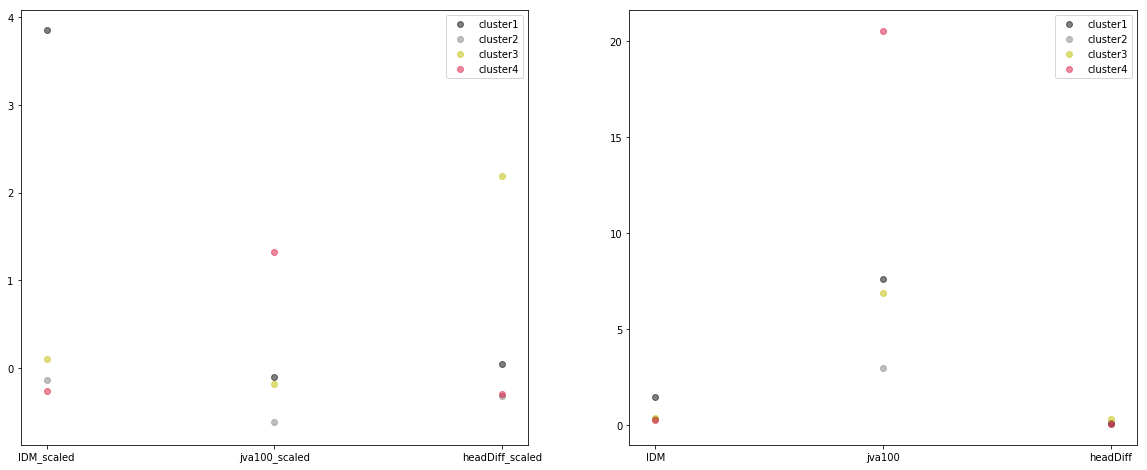

In [44]:
cluster.visualizeCluster(dfMaster_idm4, 4,['IDM_scaled','jva100_scaled','headDiff_scaled'],['IDM','jva100','headDiff'] )

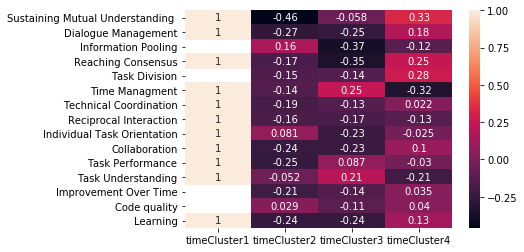

In [45]:
timeCluster_idm4 = cluster.timeCluster(dfMaster_idm4, 4)
sessions_idm4 = sessions.merge(timeCluster_idm4, on = 'Session', how = 'outer') #merge data frames for correlation
time_idm4 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4']

correlations_idm4 = sessions_idm4.corr()
ax = sns.heatmap(correlations_idm4.loc[dependent][time_idm4], annot=True)

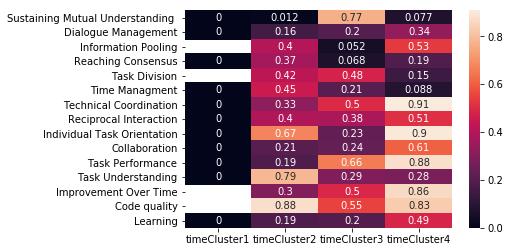

In [46]:
pvalues_idm4 = cluster.calculate_pvalues(sessions_idm4).astype(float)
ax = sns.heatmap(pvalues_idm4.loc[dependent][time_idm4], annot=True)

Significant correlations between 1) time spent in cluster 2 and sustaining mutual understanding (p = 0.012).

----
K = 5

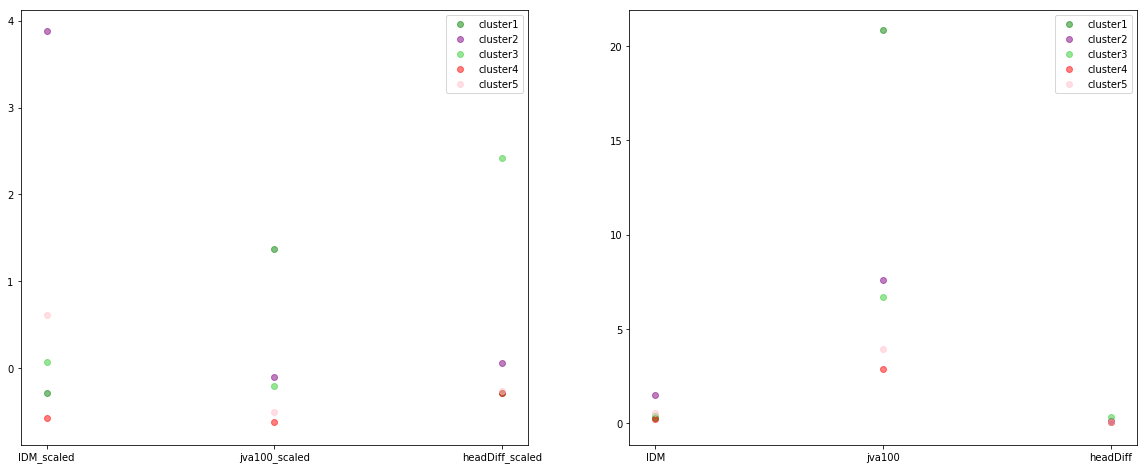

In [47]:
cluster.visualizeCluster(dfMaster_idm5, 5,['IDM_scaled','jva100_scaled','headDiff_scaled'],['IDM','jva100','headDiff'] )

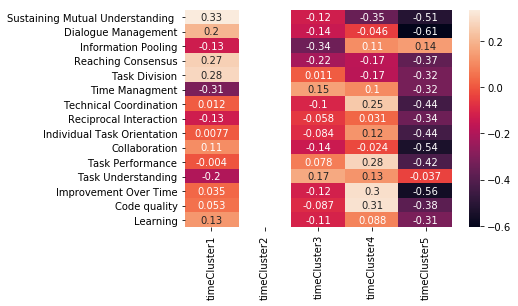

In [48]:
timeCluster_idm5 = cluster.timeCluster(dfMaster_idm5, 5)
sessions_idm5 = sessions.merge(timeCluster_idm5, on = 'Session', how = 'outer') #merge data frames for correlation
time_idm5 = ['timeCluster1','timeCluster2','timeCluster3','timeCluster4','timeCluster5']

correlations_idm5 = sessions_idm5.corr()
ax = sns.heatmap(correlations_idm5.loc[dependent][time_idm5], annot=True)

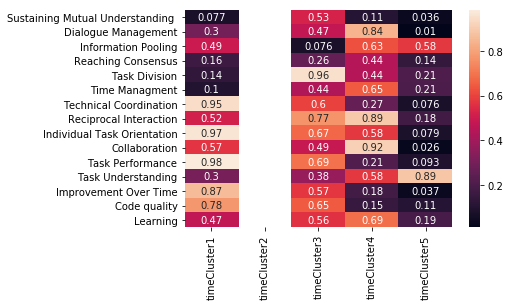

In [49]:
pvalues_idm5 = cluster.calculate_pvalues(sessions_idm5).astype(float)
ax = sns.heatmap(pvalues_idm5.loc[dependent][time_idm5], annot=True)